In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [2]:
df=pd.read_csv("data.csv")
df.shape

(11914, 16)

In [3]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


# Data cleaning

In [4]:
#drop เพราะ ไม่จำเป็นต่อการคำนวณราคารถ
df.drop(['Market Category'], axis=1, inplace=True)
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650


In [5]:
df.shape

(11914, 15)

In [6]:
df.drop(df[df['MSRP'] == 0].index,inplace=True)

In [7]:
#checking for any duplicates in the data
df.duplicated().sum()

720

In [8]:
#removing the duplicates in the data
df.drop_duplicates(keep=False,inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [9]:
#ลบค่าทีั่ซำ้เรียบร้อยแล้ว
df.shape

(10573, 15)

In [10]:
#check ค่า null ทั้งหมดในแต่บะcloumn
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [11]:
#ลบค่าที่ nullออก
df.dropna(inplace=True,axis=0)
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [12]:
df=df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [13]:
df.describe()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
count,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,10471.000000,1.047100e+04
mean,2010.921688,257.206475,5.732499,3.463375,26.174577,19.238086,1561.733932,4.309437e+04
std,6.981800,111.036029,1.778835,0.868625,7.522566,6.680493,1448.443026,6.313910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,175.000000,4.000000,2.000000,22.000000,15.000000,549.000000,2.197000e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.125000e+04
75%,2016.000000,306.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.380000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Data Analysis

<h1> 1</h1>

In [14]:
#find outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  7.0
Popularity          1460.0
Price              21830.0
dtype: float64


In [15]:
#ทำการเปลี่ยน outlier
df = df[~((df < (Q1 - 1.5*IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]
df.shape

(8206, 15)

In [16]:
#calculating percentage of each brand คำนวนหา % ของแต่ละbrand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

In [17]:
#plotting the top 10 brands 
popular_labels=counts.index[:10]

colors=['lightslategray',]*len(popular_labels)
colors[0]='crimson'

fig=go.Figure(data=[go.Bar(x=counts[:10],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented Car Brands in the Dataset',xaxis_title="Percentage",yaxis_title="Car Brand")

<h1> 2. Boxplot</h1>

In [18]:
prices = df[['Make','Price']].loc[(df['Make'].isin(popular_labels))].groupby('Make').mean()
print(prices)
#calculating the average price of top 10 brands represented in the dataset

                  Price
Make                   
Cadillac   50509.370130
Chevrolet  28546.168327
Dodge      26178.358722
GMC        33666.516199
Honda      27038.467018
Infiniti   43384.618750
Mazda      20628.445040
Nissan     28559.636542
Suzuki     18295.844037
Toyota     28759.360000


In [19]:
prices = df[['Make','Price']].loc[(df['Make'].isin(popular_labels))].groupby('Make').min()
print(prices)

           Price
Make            
Cadillac    2000
Chevrolet   2000
Dodge       2000
GMC         2000
Honda       2000
Infiniti    2000
Mazda       2000
Nissan      2000
Suzuki      2000
Toyota      2000


In [20]:
display_p=df[['Make','Year','Price']].loc[(df['Make'].isin(popular_labels))]

fig=px.box(display_p,x="Make",y="Price")
fig.update_layout(title_text='Average Price over 10 most represented Car Brands',xaxis_title="Make",yaxis_title="Average Price")
#chevrolet is the most variance
#

<h1> 3. Correlation</h1>

In [21]:
# Correlation matrix

# Correlation coefficients quantify the association between variables or features of a dataset. 
# These statistics are of high importance for science and technology, 
# and Python has great tools that you can use to calculate them. SciPy, NumPy, 
# and Pandas correlation methods are fast, comprehensive, and well-documented.

# The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. 
# You can use the built-in . corr() method on a pandas DataFrame to easily calculate the correlation matrix. Correlation ranges from -1 to 1.
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329436,-0.085893,0.252665,0.357791,0.319703,0.208960,0.579748
HP,0.329436,1.000000,0.745334,0.029354,-0.464676,-0.564127,0.099933,0.746902
Cylinders,-0.085893,0.745334,1.000000,0.009748,-0.690873,-0.744101,0.019223,0.405415
Number of Doors,0.252665,0.029354,0.009748,1.000000,0.017419,0.039197,-0.080140,0.125588
MPG-H,0.357791,-0.464676,-0.690873,0.017419,1.000000,0.937108,0.095272,-0.134604
MPG-C,0.319703,-0.564127,-0.744101,0.039197,0.937108,1.000000,0.084375,-0.211287
Popularity,0.208960,0.099933,0.019223,-0.080140,0.095272,0.084375,1.000000,0.115109
Price,0.579748,0.746902,0.405415,0.125588,-0.134604,-0.211287,0.115109,1.000000


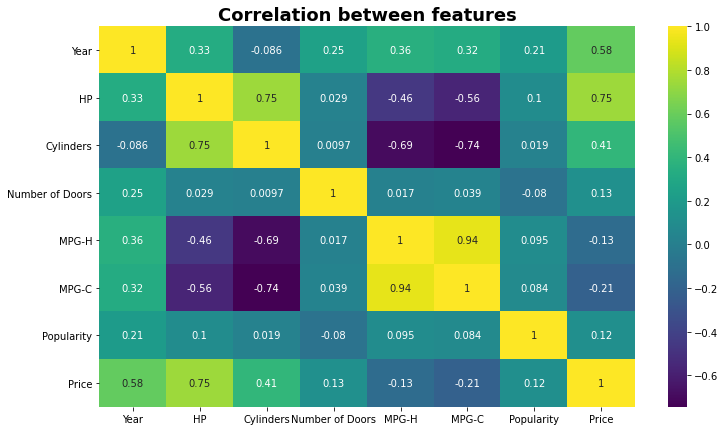

In [22]:
# Heatmap
# A heatmap is a graphical representation of data in which data values are represented as colors. 
# That is, it uses color in order to communicate a value to the reader. 
# This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.
df_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

# From the above heatmap ,we can conclude that :
# >> Price greatly depends upon features Horse Power(HP) and Year
# >> Also, the features HP and Cylinders are positively dependent on each other.

# i.e if no. of cylinders are increased, HP also increases.
# >> And features MPG-H,MPG-C are negatively dependent on Cylinders

# i.e if no. of cylinders are increased, MPG-H & MPG-C decreases.


<h1> 4. Scatter Plot</h1>

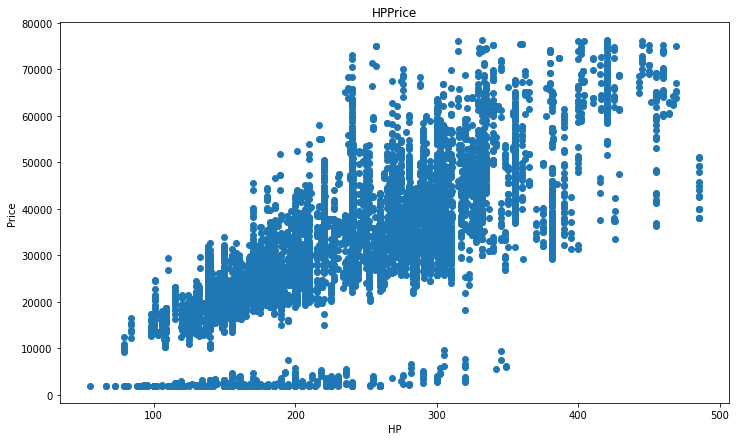

In [23]:
fig,ax = plt.subplots(figsize=(12,7))
plt.title('HPPrice')
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

<h1> 5. </h1>

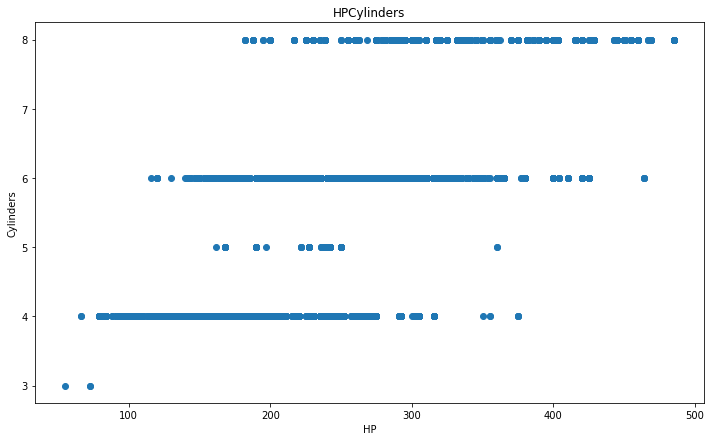

In [24]:
fig,ax = plt.subplots(figsize=(12,7))
plt.title('HPCylinders')
ax.scatter(df['HP'],df['Cylinders'])
ax.set_xlabel('HP')
ax.set_ylabel('Cylinders')
plt.show()

<h1> 6. Predicted The Price of Car by its features. </h1>

In [33]:
df.dtypes

Make                  int64
Model                 int64
Year                  int64
Engine Fuel Type      int64
HP                  float64
Cylinders           float64
Transmission          int64
Drive Mode            int64
Number of Doors     float64
Vehicle Size          int64
Vehicle Style         int64
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

In [35]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style']: df[col] = label_encoder.fit_transform(df[col])

In [36]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,6,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135
1,3,0,2011,6,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650
2,3,0,2011,6,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350
3,3,0,2011,6,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450
4,3,0,2011,6,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500


In [38]:
# splitting the dependent and independent variables
x = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values

print(x.shape)
print(y.shape)

(8206, 6)
(8206,)


Linear Regression
Linear regression is a basic and commonly used type of predictive analysis.The overall idea of regression is to examine two things:

(1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?

(2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

In [39]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [40]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6564, 6)
(6564, 1)
(1642, 6)
(1642, 1)


In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.687571734802348
Testing Accuracy : 0.6786663195731562


In [42]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([[-0.03834104],
       [-0.53358267],
       [-0.26599389],
       [-0.19866208],
       [-0.33739642]])

Text(0, 0.5, 'Predicted Values')

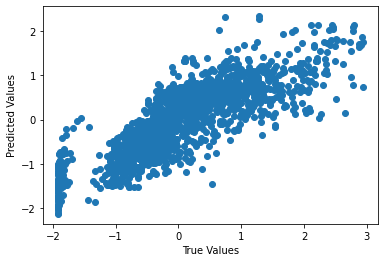

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



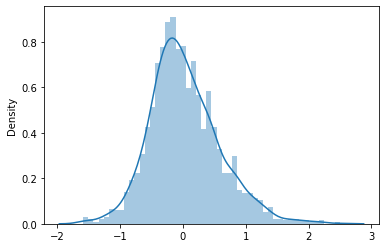

In [45]:
sns.distplot((y_test-y_pred),bins=50)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.6786663195731562
Mean Squared Error :  0.30967436623117467
MAE :  0.42699366382544685
RSME :  0.5564839316918097


In [49]:
results_df = pd.DataFrame(data=[["Linear Regression", lr_model.score(x_train,y_train),lr_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])

results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.687572,0.678666,0.678666,0.309674,0.426994,0.556484


Support Vector Machine
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [50]:
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Accuracy : 0.8214073421185062
Testing Accuracy : 0.8005519123490848


In [51]:
y_pred = svr_model.predict(x_test)
y_pred[0:5]

array([ 0.19480994, -0.75868776, -0.10242451, -0.52276736, -0.26383042])

Text(0, 0.5, 'Predicted Values')

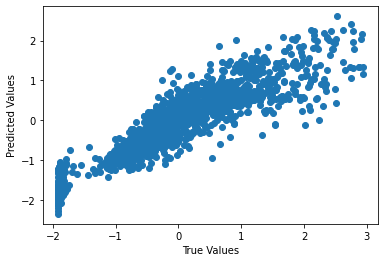

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



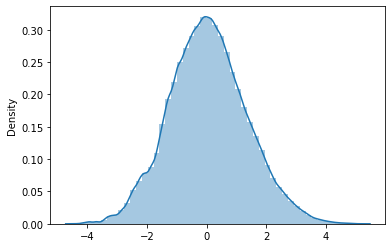

In [53]:
sns.distplot((y_test-y_pred),bins=50)

In [54]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.8005519123490848
Mean Squared Error :  0.19221128658929473
MAE :  0.310095846281782
RSME :  0.43841907644318434


In [55]:
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", svr_model.score(x_train,y_train),svr_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.687572,0.678666,0.678666,0.309674,0.426994,0.556484
1,Support Vector Machine,0.821407,0.800552,0.800552,0.192211,0.310096,0.438419


Random Forest
Random forest is like bootstrapping algorithm with Decision tree (CART) model. Say, we have 1000 observation in the complete population with 10 variables. Random forest tries to build multiple CART models with different samples and different initial variables. For instance, it will take a random sample of 100 observation and 5 randomly chosen initial variables to build a CART model. It will repeat the process (say) 10 times and then make a final prediction on each observation. Final prediction is a function of each prediction. This final prediction can simply be the mean of each prediction.

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.968498854959027
Testing Accuracy : 0.9320284902092261


In [57]:
y_pred = rfc_model.predict(x_test)
y_pred[0:5]

array([ 0.7630963 , -0.78519597, -0.13159794, -0.45164329, -0.16798329])

Text(0, 0.5, 'Predicted Values')

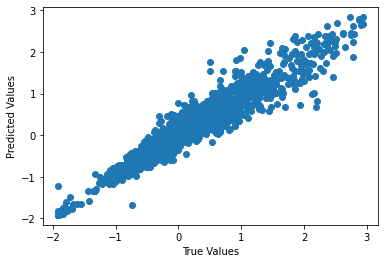

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



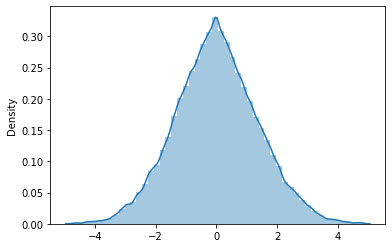

In [59]:
sns.distplot((y_test-y_pred),bins=50)

In [60]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.9320284902092261
Mean Squared Error :  0.06550522244749911
MAE :  0.1833955463052213
RSME :  0.25593988053349387


In [61]:
results_df_2 = pd.DataFrame(data=[["Random Forest", rfc_model.score(x_train,y_train),rfc_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.687572,0.678666,0.678666,0.309674,0.426994,0.556484
1,Support Vector Machine,0.821407,0.800552,0.800552,0.192211,0.310096,0.438419
2,Random Forest,0.968499,0.932028,0.932028,0.065505,0.183396,0.255940


<h1> As you can see The Random Forest Algorithm is the most accurate.<h1>